In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

<h1 align='center'>Laboratorio 3: Interferometría</h1>

### Parte 1

In [2]:
parte_1 = pd.read_csv('parte1.txt', delimiter='\t')

In [15]:
# Aquí vamos sumando los valores de los mínimos
parte_1['sum_N'] = 0
for i in range(1,len(parte_1['N'])):
    parte_1['sum_N'][i] += parte_1['sum_N'][i-1] + parte_1['N'][i]

In [20]:
x = np.linspace(parte_1['sum_N'][0], parte_1['sum_N'][len(parte_1['sum_N'])-1])
def linear(x,m,b): return m*x + b
popt_parte1, pcov_parte1 = curve_fit(linear, parte_1['sum_N'], parte_1['dN'])

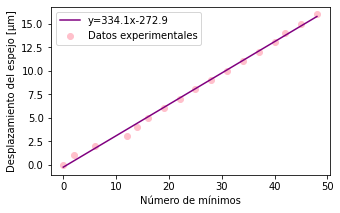

In [34]:
plt.figure(figsize=(5,5/1.61616))
plt.scatter(parte_1['sum_N'], parte_1['dN'],c='pink', label='Datos experimentales')
plt.plot(x, x*popt_parte1[0] + popt_parte1[1],c='purple', label='y={:.1f}x{:.1f}'.format(popt_parte1[0]*1000, popt_parte1[1]*1000))
plt.xlabel('Número de mínimos')
plt.ylabel(r'Desplazamiento del espejo [µm]')
plt.legend()
plt.savefig('parte1.png')

La pendiente es la mitad de la longitud de onda por la relación, $$\lambda = \frac{2d_N}{N}.$$

In [40]:
print('La longitud de onda es {:.2f} ± {:.2f} nm '.format(2*popt_parte1[0]*1000, pcov_parte1[0][0]*1000))

La longitud de onda es 668.12 ± 0.03 nm 
